# PART II : RNN: Simple RNN with Sine Wave Data (30 Points)

Generate a sine-wave data set : The student determines all the parameters to generate the data set, such as the range and the number of data points.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

###  Data pre-processing

In [2]:
x = np.linspace(0,60,1000)
y = np.sin(x)
x

array([ 0.        ,  0.06006006,  0.12012012,  0.18018018,  0.24024024,
        0.3003003 ,  0.36036036,  0.42042042,  0.48048048,  0.54054054,
        0.6006006 ,  0.66066066,  0.72072072,  0.78078078,  0.84084084,
        0.9009009 ,  0.96096096,  1.02102102,  1.08108108,  1.14114114,
        1.2012012 ,  1.26126126,  1.32132132,  1.38138138,  1.44144144,
        1.5015015 ,  1.56156156,  1.62162162,  1.68168168,  1.74174174,
        1.8018018 ,  1.86186186,  1.92192192,  1.98198198,  2.04204204,
        2.1021021 ,  2.16216216,  2.22222222,  2.28228228,  2.34234234,
        2.4024024 ,  2.46246246,  2.52252252,  2.58258258,  2.64264264,
        2.7027027 ,  2.76276276,  2.82282282,  2.88288288,  2.94294294,
        3.003003  ,  3.06306306,  3.12312312,  3.18318318,  3.24324324,
        3.3033033 ,  3.36336336,  3.42342342,  3.48348348,  3.54354354,
        3.6036036 ,  3.66366366,  3.72372372,  3.78378378,  3.84384384,
        3.9039039 ,  3.96396396,  4.02402402,  4.08408408,  4.14

In [3]:
y

array([ 0.00000000e+00,  6.00239584e-02,  1.19831463e-01,  1.79206840e-01,
        2.37935974e-01,  2.95807081e-01,  3.52611471e-01,  4.08144298e-01,
        4.62205306e-01,  5.14599543e-01,  5.65138069e-01,  6.13638635e-01,
        6.59926343e-01,  7.03834272e-01,  7.45204087e-01,  7.83886601e-01,
        8.19742320e-01,  8.52641945e-01,  8.82466836e-01,  9.09109439e-01,
        9.32473678e-01,  9.52475299e-01,  9.69042174e-01,  9.82114560e-01,
        9.91645316e-01,  9.97600074e-01,  9.99957360e-01,  9.98708673e-01,
        9.93858516e-01,  9.85424379e-01,  9.73436677e-01,  9.57938639e-01,
        9.38986154e-01,  9.16647565e-01,  8.91003429e-01,  8.62146222e-01,
        8.30180007e-01,  7.95220057e-01,  7.57392443e-01,  7.16833576e-01,
        6.73689717e-01,  6.28116447e-01,  5.80278109e-01,  5.30347215e-01,
        4.78503822e-01,  4.24934884e-01,  3.69833577e-01,  3.13398603e-01,
        2.55833474e-01,  1.97345777e-01,  1.38146426e-01,  7.84489014e-02,
        1.84684804e-02, -

### EDA the data form

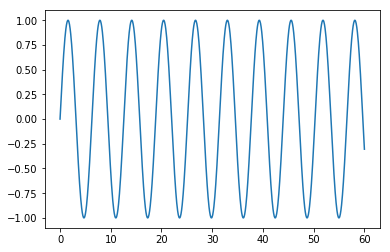

In [4]:
plt.plot(x,y)

### Build, train and evaluate

Build, train, and evaluate a simple recurrent neural network (a complete simple RNN) that has two layers : a SimpleRNN and a fully-connected layer in Keras. The student needs to determine how many neurons are used in the SimpleRNN layer. All the code related to the project is done in Python using Jupyter Notebook.


### Transform y into dataframe form

In [5]:
df = pd.DataFrame(data= y, index=x, columns=['Sin'])
df.head(5)

,Sin
0.00000,0.000000
0.06006,0.060024
0.12012,0.119831
0.18018,0.179207
0.24024,0.237936


In [6]:
test_percent = 0.2

In [7]:
testing_data = len(df)*test_percent

In [8]:
test_start_index = int(len(df)-testing_data)
data_train = df.iloc[:test_start_index] 
data_test = df.iloc[test_start_index:]

In [9]:
print("training dataset\n",data_train.head(5), "\n\n")
print("testing dataset\n",data_test.head(5))

training dataset
               Sin
0.00000  0.000000
0.06006  0.060024
0.12012  0.119831
0.18018  0.179207
0.24024  0.237936 


testing dataset
                 Sin
48.048048 -0.798114
48.108108 -0.832840
48.168168 -0.864562
48.228228 -0.893167
48.288288 -0.918551


### Normalize Data(Scale the data to be zero to one)

In [10]:
scaler = MinMaxScaler()
# create minmax class

In [11]:
scaler.fit(data_train)
#train the data fit scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [12]:
normalized_train = scaler.transform(data_train)
#normalized train
normalized_test = scaler.transform(data_test)

### Create TimeseriesGenerator Instance

In [13]:
#time generate time series to train time series 
length = 50
#use 50 history data points to predict future one

batch_size = 1
#batch = set of sample (1 sample = lenght = 50 historical data point)

train_tsGenerator50 = TimeseriesGenerator(normalized_train, normalized_train, length = length, batch_size = batch_size)
#create a Timeseries for training(input : normalized_train, normalized_train, lenght = length, batch_size = batch_size)
#provide constructure of class TimeseriesGenerator with 4 parameters as normalized_train, normalized_train, length, batch_size

In [14]:
X,y = train_tsGenerator50[0]
X.flatten()

array([0.49999737, 0.53000951, 0.55991342, 0.58960127, 0.61896599,
       0.64790169, 0.67630404, 0.7040706 , 0.73110124, 0.7572985 ,
       0.78256789, 0.8068183 , 0.82996228, 0.85191636, 0.87260138,
       0.89194273, 0.90987069, 0.92632059, 0.94123311, 0.95455448,
       0.96623666, 0.97623753, 0.98452101, 0.99105723, 0.99582264,
       0.99880003, 0.99997868, 0.99935433, 0.99692924, 0.99271215,
       0.98671827, 0.97896921, 0.96949292, 0.95832356, 0.94550143,
       0.93107275, 0.91508956, 0.89760949, 0.87869559, 0.85841605,
       0.836844  , 0.81405725, 0.79013795, 0.76517238, 0.73925054,
       0.71246593, 0.68491513, 0.6566975 , 0.62791478, 0.59867078])

In [15]:
n_features = 1

model = Sequential()

model.add(SimpleRNN(64, input_shape=(length, n_features)))
#The SimpleRNN layer has 64 neurons. 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


### Second layer is Fully conected layer

In [16]:
model.add(Dense(1))

### Complie Model

In [17]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 64)                4224      
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


### Train (Fit) Model

In [18]:
history = model.fit_generator(train_tsGenerator50, epochs = 5)
#generate the data itself to train the model
#epochs = the times that model be trained 

Epoch 1/5
750/750 [==============================] - 8s 11ms/step - loss: 0.0037
Epoch 2/5
750/750 [==============================] - 7s 9ms/step - loss: 1.3216e-04
Epoch 3/5
750/750 [==============================] - 7s 9ms/step - loss: 2.4239e-04
Epoch 4/5
750/750 [==============================] - 7s 9ms/step - loss: 2.1015e-04
Epoch 5/5
750/750 [==============================] - 7s 9ms/step - loss: 6.6899e-05


### Visualize model's performance after training

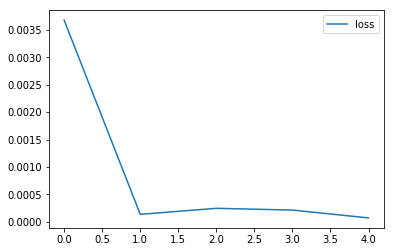

In [19]:
df_model_loss = pd.DataFrame(model.history.history)
df_model_loss.plot()

In [20]:
length

50

In [21]:
first_eval_batch = normalized_train[-length:]
first_eval_batch
#the last training of the first batch of dataset

array([[0.93684745],
       [0.95065988],
       [0.96284716],
       [0.97336535],
       [0.98217651],
       [0.98924887],
       [0.99455694],
       [0.99808155],
       [0.99981001],
       [0.99973609],
       [0.99786004],
       [0.99418864],
       [0.98873512],
       [0.98151915],
       [0.97256675],
       [0.96191021],
       [0.94958795],
       [0.93564441],
       [0.92012988],
       [0.90310029],
       [0.88461706],
       [0.86474684],
       [0.8435613 ],
       [0.82113681],
       [0.79755426],
       [0.77289868],
       [0.74725898],
       [0.72072763],
       [0.69340029],
       [0.66537552],
       [0.63675437],
       [0.60764007],
       [0.57813758],
       [0.54835332],
       [0.51839468],
       [0.48836969],
       [0.45838664],
       [0.42855363],
       [0.39897827],
       [0.36976719],
       [0.34102574],
       [0.31285756],
       [0.28536423],
       [0.25864489],
       [0.2327959 ],
       [0.20791048],
       [0.18407835],
       [0.161

The shape should be 3D :
The first_eval_batch: current is 2D array that need to be reshaping first-axis : number of sample in the batch

second-axis : number of time series step, number of the features

In [22]:
#The first number (the number of sample in the batch) =1
#length = number of time series step
#n_features = number of the features
#three square bucket has 50 numbers in a batch

first_eval_batch = first_eval_batch.reshape((1,length, n_features))
first_eval_batch

array([[[0.93684745],
        [0.95065988],
        [0.96284716],
        [0.97336535],
        [0.98217651],
        [0.98924887],
        [0.99455694],
        [0.99808155],
        [0.99981001],
        [0.99973609],
        [0.99786004],
        [0.99418864],
        [0.98873512],
        [0.98151915],
        [0.97256675],
        [0.96191021],
        [0.94958795],
        [0.93564441],
        [0.92012988],
        [0.90310029],
        [0.88461706],
        [0.86474684],
        [0.8435613 ],
        [0.82113681],
        [0.79755426],
        [0.77289868],
        [0.74725898],
        [0.72072763],
        [0.69340029],
        [0.66537552],
        [0.63675437],
        [0.60764007],
        [0.57813758],
        [0.54835332],
        [0.51839468],
        [0.48836969],
        [0.45838664],
        [0.42855363],
        [0.39897827],
        [0.36976719],
        [0.34102574],
        [0.31285756],
        [0.28536423],
        [0.25864489],
        [0.2327959 ],
        [0

In [23]:
first_eval_batch.shape
#shape of first_eval_batch

(1, 50, 1)

### Evaluated model

In [24]:
#Declear a list to store all the predictions
#Similar to: test_prediction = list()
test_prediction = []

frist_eval_batch = normalized_train[-length:]
# the last 50 data point of dataset

#reshape the last 50 data points to be 3D
current_batch = first_eval_batch.reshape((1,length,n_features))

# run 200 times same as the 200 data points intest_length
for i in range(len(data_test)):
    current_pred = model.predict(current_batch)[0]
    #get the predict value from the current_batch (first batch that has 50 data points)
    
    test_prediction.append(current_pred)
    #store prediction into the list of predictions
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    #drop the first data point and add the last data point to the end of the batch
    #current_batch[:,1:,:] = take the index 1 to the end which mean drop the 0 position 
    #and add the end of the list by [[current_pred]] on the axis=1
#do it 200 times

In [25]:
#transform the normalized data(0 to 1) into back to real value
true_predictions = scaler.inverse_transform(test_prediction)

true_predictions

array([[-0.79408699],
       [-0.8266764 ],
       [-0.85624549],
       [-0.88155734],
       [-0.90317575],
       [-0.92031313],
       [-0.93437159],
       [-0.94415378],
       [-0.95062395],
       [-0.95361072],
       [-0.95313228],
       [-0.94960625],
       [-0.94228   ],
       [-0.9322708 ],
       [-0.92028861],
       [-0.90542328],
       [-0.88810364],
       [-0.86852517],
       [-0.84708662],
       [-0.82368343],
       [-0.79853669],
       [-0.77153769],
       [-0.74253538],
       [-0.71213723],
       [-0.67991191],
       [-0.64559239],
       [-0.60982017],
       [-0.57206938],
       [-0.53215212],
       [-0.49004118],
       [-0.44587997],
       [-0.39988188],
       [-0.35177266],
       [-0.30126389],
       [-0.24846554],
       [-0.19378375],
       [-0.13753371],
       [-0.0796498 ],
       [-0.02018709],
       [ 0.04020658],
       [ 0.10149974],
       [ 0.16301451],
       [ 0.22442223],
       [ 0.28527933],
       [ 0.34498582],
       [ 0

In [26]:
data_test

,Sin
48.048048,-0.798114
48.108108,-0.832840
48.168168,-0.864562
48.228228,-0.893167
48.288288,-0.918551
...,...
59.759760,-0.069443
59.819820,-0.129197
59.879880,-0.188485
59.939940,-0.247093


In [27]:
data_test['Predictions']=true_predictions
data_test

,Sin,Predictions
48.048048,-0.798114,-0.794087
48.108108,-0.832840,-0.826676
48.168168,-0.864562,-0.856245
48.228228,-0.893167,-0.881557
48.288288,-0.918551,-0.903176
...,...,...
59.759760,-0.069443,-0.133810
59.819820,-0.129197,-0.188290
59.879880,-0.188485,-0.242515
59.939940,-0.247093,-0.296219


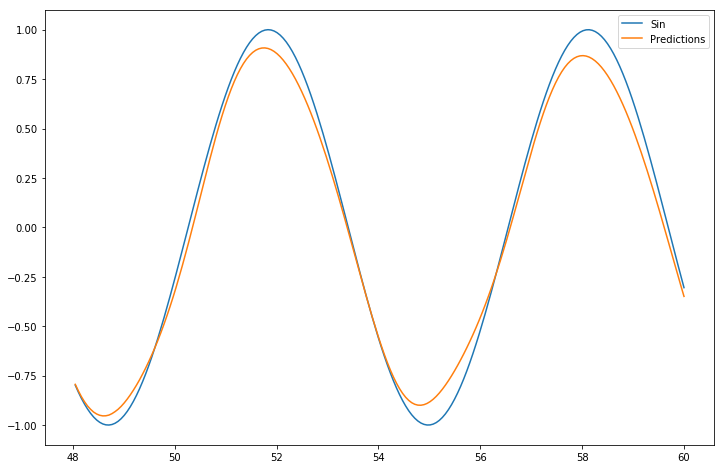

In [28]:
data_test.plot(figsize=(12,8))